In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
seaborn.set(style="darkgrid")

In [3]:
dataframe = pandas.read_csv('fortune500.csv')

In [4]:
dataframe.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [5]:
dataframe.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [6]:
dataframe.columns

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')

In [7]:
 dataframe.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [8]:
len(dataframe)

25500

In [9]:
dataframe.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

profit should be a `float64`, not an object. Inspect the issue.

In [10]:
non_numeric_profits = dataframe['profit'].str.contains('[^0-9-.]')
dataframe.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Now that we know that there are non-numeric values in the profit column, get a set of all non-numeric values

In [11]:
set(dataframe['profit'][non_numeric_profits])

{'N.A.'}

There is only one possible non-numeric value in the profits column : N.A.

In [12]:
len(dataframe['profit'][non_numeric_profits])

369

This is a small part of the dataset, but non completely inconsequential (around 1.5%).  
If rows containing N.A. are **uniformly distributed** over the years, the easiest solution would   
be to remove them.

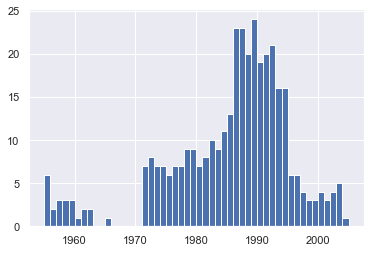

In [13]:
bin_sizes, _, _ = plt.hist(dataframe['year'][non_numeric_profits], bins = range(1955, 2006))

In a single year, the most amount of invalid values is less than 25. At 500 data points per year,\
those values account for less than 5% of relevant data for the worst years. Get rid of them. 

In [14]:
# dataframe rows are filtered through inversion of 
# boolean series given by 'non_numeric_profits'
dataframe = dataframe.loc[~non_numeric_profits]
dataframe['profit'] = dataframe['profit'].apply(pandas.to_numeric)

Starting with 25500 data points, and after removing 369 data points, we should be left with  
**25131 data points**.

In [15]:
len(dataframe)

25131

In [16]:
dataframe.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Everything is in order

## Averages and Standard Deviations For Each Year

In [17]:
year_groups = dataframe[['year', 'revenue', 'profit']].groupby('year')
averages = year_groups.mean()
averages.head()

,revenue,profit
year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276


In [18]:
stddevs = year_groups.std()
stddevs.head()

,revenue,profit
year,,
1955,614.042551,53.492642
1956,775.139363,74.418791
1957,749.673979,65.940888
1958,808.427573,67.683555
1959,716.615711,52.371809


In [19]:
x_vals = averages.index
average_profit = averages['profit']
average_revenue = averages['revenue']
stddev_profit = stddevs['profit']
stddev_revenue = stddevs['revenue']
def plot_with_vals(axis, x, y, title, y_label):
    axis.set_title(title)
    axis.set_ylabel(y_label)
    axis.plot(x, y)

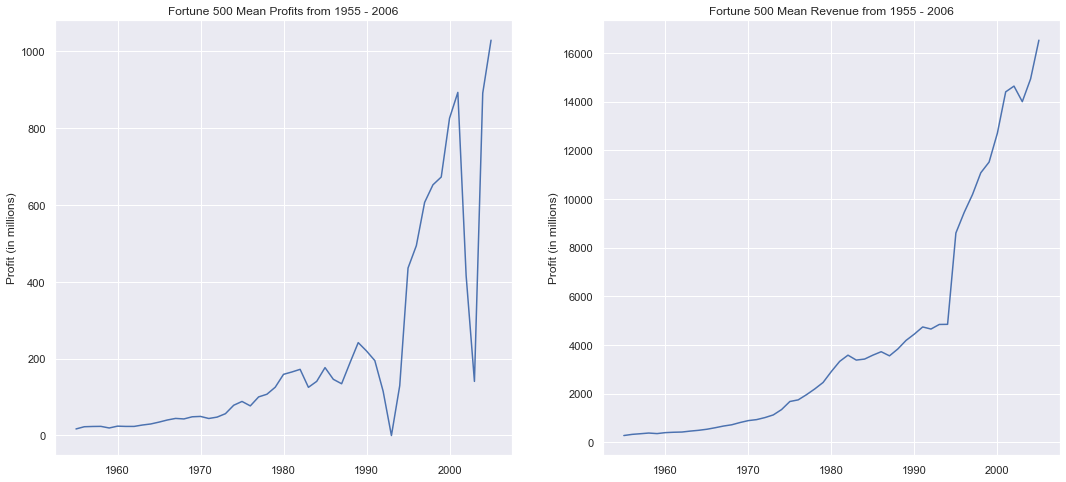

In [20]:
fig, (gr_prof, gr_rev) = plt.subplots(1, 2, figsize=(18, 8))
plot_with_vals(gr_prof, x_vals, average_profit, 
     "Fortune 500 Mean Profits from 1955 - 2006", "Profit (in millions)")
plot_with_vals(gr_rev, x_vals, average_revenue,
    "Fortune 500 Mean Revenue from 1955 - 2006", "Profit (in millions)")

In [21]:
def plot_with_stds(axis, x, y, stds, title, y_label):
    axis.fill_between(x, y - stds, y + stds, alpha = 0.2)
    plot_with_vals(axis, x, y, title, y_label)

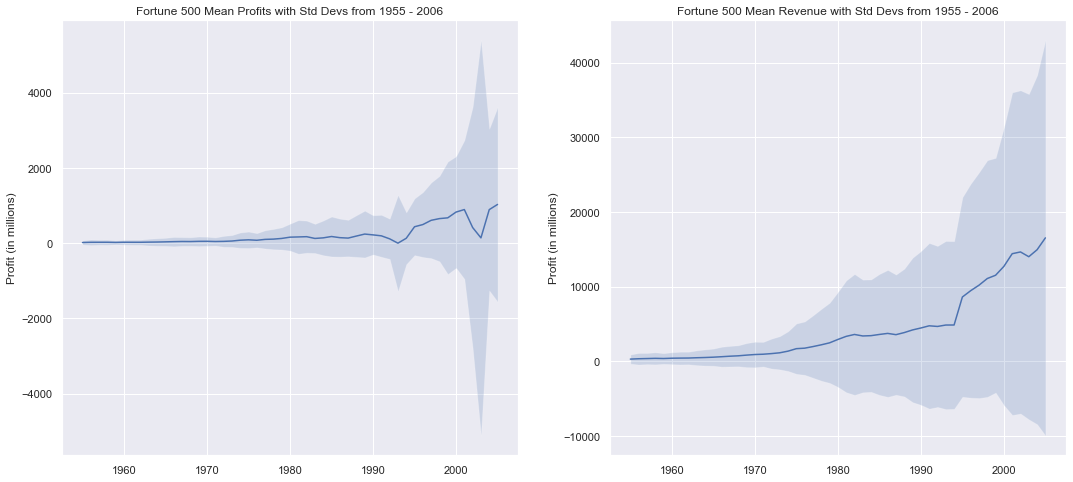

In [22]:
fig, (gr_sdprof, gr_sdrev) = plt.subplots(1, 2, figsize=(18, 8))
plot_with_stds(gr_sdprof, x_vals, average_profit, stddev_profit,
              "Fortune 500 Mean Profits with Std Devs from 1955 - 2006", "Profit (in millions)")
plot_with_stds(gr_sdrev, x_vals, average_revenue, stddev_revenue,
              "Fortune 500 Mean Revenue with Std Devs from 1955 - 2006", "Profit (in millions)")

Variance is staggeringly large. In addition, standard deviations seem to increase with rising profits.   
Volatility and risk is increasing with the years.